# Data Librarian Modul 2: **PyTerrier** Aufgabe

In [167]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline
import pyterrier as pt
import requests
import pandas as pd
import pickle
import numpy as np
import os

from tools import littlehelper as lh

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

os.environ["JAVA_HOME"] = "./jdk/Contents/Home/"

## Load data from [bibsonomy.org](https://www.bibsonomy.org)

In [221]:
queries = ['makerspace', 'virtual reality', 'mixed reality', 'augmented reality']

df = lh.df_from_bibsonomy_query(queries, 
                                to_json=True,
                                limit=1000,
                                output_dir='./bibsonomy_raw_data/',
                                output_filename='makerspaces_vr.json')

Query: 'makerspace'. Number of items retrieved: 187
Query: 'virtual reality'. Number of items retrieved: 1335
Query: 'mixed reality'. Number of items retrieved: 1071
Query: 'augmented reality'. Number of items retrieved: 1256

Saved data to "bibsonomy_raw_data/makerspaces_vr.json"


## Load `json`

In [241]:
# Set json_file to load
json_infile = './bibsonomy_raw_data/makerspaces_vr.json'

In [242]:
df = pd.read_json(json_infile)
df.head()

,type,id,tags,intraHash,label,user,description,date,changeDate,count,...,citeulike-linkout-3,opac,status,oai-id,oai-set,unit,details,documenturl,review,journaltitle
0,Bookmark,https://www.bibsonomy.org/url/a10ba61e8b7f7ca6...,[Unsortierte_Lesezeichen],a10ba61e8b7f7ca6db55da2670090ef2,Attraktor - Der Makerspace in Hamburg,robingarcia,Der gemeinnützige Attraktor e. V. betreibt den...,2017-03-17 10:34:46,2017-04-13 09:59:00,1,...,None,None,None,None,None,None,None,None,None,None
1,Bookmark,https://www.bibsonomy.org/url/6093e51d381e6c5c...,"[educação, maker]",6093e51d381e6c5c2a7d5ee954f7c1ee,Why Makerspaces are Changing the World – Betab...,christianoavila,While in college I learned about engineering i...,2017-05-09 12:48:55,2017-05-09 12:48:55,1,...,None,None,None,None,None,None,None,None,None,None
2,Bookmark,https://www.bibsonomy.org/url/90a1ee85e2acf284...,"[thinking, design, makerspace, makers, learnin...",90a1ee85e2acf284765373ea8756d255,Design Thinking Process and UDL Planning Tool ...,yish,"If there is a makerspace in your school, it ma...",2017-12-25 16:06:35,2017-12-25 16:06:35,1,...,None,None,None,None,None,None,None,None,None,None
3,Bookmark,https://www.bibsonomy.org/url/f1009e9d37cb7bfd...,"[labs, tesis, maker]",f1009e9d37cb7bfdf0208ac6d7f052b4,Albemarle County Schools’ Journey From a Maker...,djimenezsanchez,,2016-08-04 09:40:49,2016-08-04 09:40:49,1,...,None,None,None,None,None,None,None,None,None,None
4,Bookmark,https://www.bibsonomy.org/url/5d1439dd75497437...,"[makerspace, makers, israel, education, maker]",5d1439dd7549743700296c739da928ee,XLN - Anything is possible. Anyone Can.,yish,,2017-06-08 14:45:40,2017-06-08 14:45:40,1,...,None,None,None,None,None,None,None,None,None,None


In [243]:
df.shape

(3849, 128)

In [244]:
df['search_string'].value_counts()

search_string
virtual reality      1335
augmented reality    1256
mixed reality        1071
makerspace            187
Name: count, dtype: int64

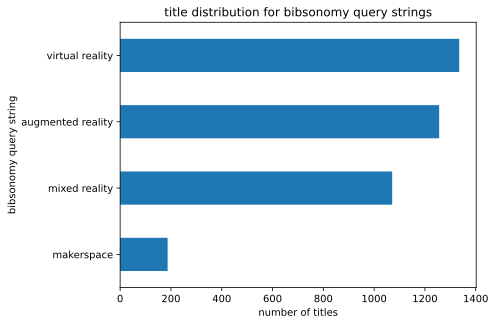

In [245]:
df['search_string'].value_counts().sort_values(ascending=True).plot(kind='barh',
                                                                    xlabel='number of titles',
                                                                    ylabel='bibsonomy query string',
                                                                    title='title distribution for bibsonomy query strings');

In [246]:
df.head(3)

,type,id,tags,intraHash,label,user,description,date,changeDate,count,...,citeulike-linkout-3,opac,status,oai-id,oai-set,unit,details,documenturl,review,journaltitle
0,Bookmark,https://www.bibsonomy.org/url/a10ba61e8b7f7ca6...,[Unsortierte_Lesezeichen],a10ba61e8b7f7ca6db55da2670090ef2,Attraktor - Der Makerspace in Hamburg,robingarcia,Der gemeinnützige Attraktor e. V. betreibt den...,2017-03-17 10:34:46,2017-04-13 09:59:00,1,...,None,None,None,None,None,None,None,None,None,None
1,Bookmark,https://www.bibsonomy.org/url/6093e51d381e6c5c...,"[educação, maker]",6093e51d381e6c5c2a7d5ee954f7c1ee,Why Makerspaces are Changing the World – Betab...,christianoavila,While in college I learned about engineering i...,2017-05-09 12:48:55,2017-05-09 12:48:55,1,...,None,None,None,None,None,None,None,None,None,None
2,Bookmark,https://www.bibsonomy.org/url/90a1ee85e2acf284...,"[thinking, design, makerspace, makers, learnin...",90a1ee85e2acf284765373ea8756d255,Design Thinking Process and UDL Planning Tool ...,yish,"If there is a makerspace in your school, it ma...",2017-12-25 16:06:35,2017-12-25 16:06:35,1,...,None,None,None,None,None,None,None,None,None,None


In [247]:
df.tail(3)

,type,id,tags,intraHash,label,user,description,date,changeDate,count,...,citeulike-linkout-3,opac,status,oai-id,oai-set,unit,details,documenturl,review,journaltitle
3846,Publication,https://www.bibsonomy.org/bibtex/2f9ab9ad1d6ef...,[dblp],f9ab9ad1d6efa6e13d5c9f1d656a01d1,Mobile augmented reality for browsing physical...,dblp,,2018-11-06,2018-11-07 15:22:31,1,...,None,None,None,None,None,None,None,None,None,None
3847,Publication,https://www.bibsonomy.org/bibtex/2d9c365efe0da...,[dblp],d9c365efe0daa197ca15113c2edb8cc0,A Projection-based Medical Augmented Reality S...,dblp,,2018-11-06,2018-11-07 13:34:32,1,...,None,None,None,None,None,None,None,None,None,None
3848,Publication,https://www.bibsonomy.org/bibtex/268bdd48b5861...,[dblp],68bdd48b58619875e909f73a0a019b81,Occlusion registration in video-based augmente...,dblp,,2018-11-06,2018-11-07 14:20:38,1,...,None,None,None,None,None,None,None,None,None,None


## **Data cleaning**

### Drop columns

In [248]:
len(df.columns) # column count

128

#### Useful columns with lower value counts that **should not** be dropped

In [249]:
print(f"'abstract' column entry count: {len(df.query('abstract.notna()')[['id', 'abstract']])}")

'abstract' column entry count: 531


#### Drop columns with less than 500 entries

In [250]:
col_counts = df.count()
col_500 = col_counts[col_counts > 500]
col_500.sort_values()

series            506
abstract          531
number            664
journal           878
volume           1223
editors          1352
editor           1352
isbn             1645
publisher        2038
booktitle        2095
ee               2342
pages            2626
author           3112
authors          3112
pub-type         3149
bibtexKey        3149
year             3149
interHash        3149
type             3849
count            3849
changeDate       3849
date             3849
description      3849
user             3849
label            3849
intraHash        3849
tags             3849
id               3849
url              3849
search_string    3849
dtype: int64

In [251]:
df_clean = df.filter(col_500.index)
df_clean.head(3)

,type,id,tags,intraHash,label,user,description,date,changeDate,count,...,pages,abstract,isbn,bibtexKey,journal,series,volume,number,ee,search_string
0,Bookmark,https://www.bibsonomy.org/url/a10ba61e8b7f7ca6...,[Unsortierte_Lesezeichen],a10ba61e8b7f7ca6db55da2670090ef2,Attraktor - Der Makerspace in Hamburg,robingarcia,Der gemeinnützige Attraktor e. V. betreibt den...,2017-03-17 10:34:46,2017-04-13 09:59:00,1,...,None,None,None,None,None,None,None,None,None,makerspace
1,Bookmark,https://www.bibsonomy.org/url/6093e51d381e6c5c...,"[educação, maker]",6093e51d381e6c5c2a7d5ee954f7c1ee,Why Makerspaces are Changing the World – Betab...,christianoavila,While in college I learned about engineering i...,2017-05-09 12:48:55,2017-05-09 12:48:55,1,...,None,None,None,None,None,None,None,None,None,makerspace
2,Bookmark,https://www.bibsonomy.org/url/90a1ee85e2acf284...,"[thinking, design, makerspace, makers, learnin...",90a1ee85e2acf284765373ea8756d255,Design Thinking Process and UDL Planning Tool ...,yish,"If there is a makerspace in your school, it ma...",2017-12-25 16:06:35,2017-12-25 16:06:35,1,...,None,None,None,None,None,None,None,None,None,makerspace


### Clean `year` column

In [252]:
# Fill missing year values with np.nan
df_clean.loc[:, 'year'] = df_clean['year'].fillna(np.nan)

# Check for incorrect year values
df_clean[(df_clean['year'].notna()) & (df_clean['year'].str.contains('\D+', regex=True))][['id', 'year']]

,id,year
694,https://www.bibsonomy.org/bibtex/2b6e28fc1c8cd...,"2019, to appear"
1016,https://www.bibsonomy.org/bibtex/29e5bb6d85acc...,2021
3098,https://www.bibsonomy.org/bibtex/2d62f6d7ab928...,2021
3101,https://www.bibsonomy.org/bibtex/2d62f6d7ab928...,2021


In [253]:
# Clean
df_clean.loc[:, 'year'] = df_clean['year'].str.strip().replace(r'\D+', '', regex=True)

# Check
df_clean[~(df_clean['year'].notna()) & (df_clean['year'].str.match('\d{4}'))][['year']]

,year


### Clean `isbn` column

In [254]:
# Clean
df_clean['isbn'] = df_clean['isbn'].str.replace(r'\D+', '', regex=True)

# Check
df_clean[(df_clean['isbn'].notna()) & (df_clean['isbn'].str.contains(r'[^\d]', regex=True))][['isbn']]

,isbn


### Clean `abstract` column

In [256]:
# Clean
pattern = "\\\\textquotedbl|\r|\n|\t|\\xa0|\s{3,}|`|'{2,}"
df_clean['abstract'] = df_clean['abstract'].str.strip().replace(pattern, ' ', regex=True)
df_clean['abstract'] = df_clean['abstract'].str.strip().replace('\s{2,}', ' ', regex=True)

# Check
df_clean[(df_clean['abstract'].notna())]['abstract'].to_list()

["You may have heard the term makerspace and wondered what it meant. Makerspaces are, simply put, places where people gather to make things. Although that may sound like a simplistic definition, the things that can be created in a makerspace vary a great deal. Makerspaces can be high tech, low tech, and everything in between. A makerspace's offerings revolve around the needs of the community it serves, but the one thing all have in common is that they bring people together to share ideas. Typically, the first thing that comes to mind when thinking about mak- erspaces is 3D printing, but when it comes to what’s going on in makerspaces around the world, that’s just the tip of the iceberg. Makers create things, ideas, and concepts. Makers work in metal, wood, plastic, fabric, paper, and digital forms. From robotics to crocheting, there are no limits to your makerspace. Let your imagination run wild. In this chapter, we’ll provide the information and ideas to get your maker-spaces up and r

### Filter for relevant **PyTerrier** columns

In [257]:
# Select only publications first
df_filtered = df_clean.query('type == "Publication"')
df_filtered.head()

,type,id,tags,intraHash,label,user,description,date,changeDate,count,...,pages,abstract,isbn,bibtexKey,journal,series,volume,number,ee,search_string
38,Publication,https://www.bibsonomy.org/bibtex/2e033978aa497...,[greenbib],e033978aa4971fb861cc33beb8c3bb7c,How to start a library makerspace,bibgreen,,2023-02-05 21:50:14,2023-02-16 11:47:43,1,...,3-18,You may have heard the term makerspace and won...,9780838915042,Bronkar.2017,None,None,None,None,None,makerspace
39,Publication,https://www.bibsonomy.org/bibtex/2fb48ac294725...,"[assessment, outcomes, makerspace, learningana...",fb48ac2947255e4aca45f9dcc913a382,Informing Makerspace Outcomes Through a Lingui...,ereidt,,2020-02-18 21:35:21,2020-02-18 21:35:21,1,...,None,A growing body of research focuses on what out...,None,Oliver2020,International Journal of Science and Mathemati...,None,None,None,None,makerspace
40,Publication,https://www.bibsonomy.org/bibtex/2789d019603b4...,[greenbib],789d019603b437609dec3272a28f24a9,The makerspace librarian's sourcebook,bibgreen,,2023-02-05 21:52:55,2023-02-05 21:52:55,1,...,None,The Makerspace Librarian's Sourcebook is an es...,9780838915042,Kroski.2017,None,None,None,None,None,makerspace
41,Publication,https://www.bibsonomy.org/bibtex/2309634b7a919...,[greenbib],309634b7a919e39e8f8f3289b783ff57,Terrific makerspace projects: A practical guid...,bibgreen,,2023-02-05 16:28:34,2023-02-05 16:28:34,1,...,None,Step-by-step instructions to guide you through...,9781538131824,Denzer.2020,None,Practical guides for librarians,no. 67,None,None,makerspace
42,Publication,https://www.bibsonomy.org/bibtex/21c020a4a195d...,[greenbib],1c020a4a195d8f9dcad4ed295bfbf0e5,Sustainability: Keeping the library makerspace...,bibgreen,,2023-02-16 11:58:46,2023-02-16 11:58:46,1,...,325-344,None,9780838915042,Ginsberg.2017,None,None,None,None,None,makerspace


In [258]:
# Filter for relevant columns
columns = ['search_string', 'id', 'author', 
           'label', 'year', 'abstract', 'tags', 
           'pub-type', 'publisher', 'isbn', 'url']

df_filtered = df_filtered[columns]
df_filtered.head(3)

,search_string,id,author,label,year,abstract,tags,pub-type,publisher,isbn,url
38,makerspace,https://www.bibsonomy.org/bibtex/2e033978aa497...,[Cherie Bronkar],How to start a library makerspace,2017,You may have heard the term makerspace and won...,[greenbib],incollection,ALA Editions,9780838915042,
39,makerspace,https://www.bibsonomy.org/bibtex/2fb48ac294725...,"[Kevin M. Oliver, Jennifer K. Houchins, Robert...",Informing Makerspace Outcomes Through a Lingui...,2020,A growing body of research focuses on what out...,"[assessment, outcomes, makerspace, learningana...",article,None,None,https://doi.org/10.1007/s10763-020-10060-2
40,makerspace,https://www.bibsonomy.org/bibtex/2789d019603b4...,None,The makerspace librarian's sourcebook,2017,The Makerspace Librarian's Sourcebook is an es...,[greenbib],standard,ALA Editions,9780838915042,


### Rename columns for easier **PyTerrier** import

In [259]:
df_filtered = df_filtered.rename(columns={'id': 'docno',
                                          'label': 'text'})
df_filtered.head(3)

,search_string,docno,author,text,year,abstract,tags,pub-type,publisher,isbn,url
38,makerspace,https://www.bibsonomy.org/bibtex/2e033978aa497...,[Cherie Bronkar],How to start a library makerspace,2017,You may have heard the term makerspace and won...,[greenbib],incollection,ALA Editions,9780838915042,
39,makerspace,https://www.bibsonomy.org/bibtex/2fb48ac294725...,"[Kevin M. Oliver, Jennifer K. Houchins, Robert...",Informing Makerspace Outcomes Through a Lingui...,2020,A growing body of research focuses on what out...,"[assessment, outcomes, makerspace, learningana...",article,None,None,https://doi.org/10.1007/s10763-020-10060-2
40,makerspace,https://www.bibsonomy.org/bibtex/2789d019603b4...,None,The makerspace librarian's sourcebook,2017,The Makerspace Librarian's Sourcebook is an es...,[greenbib],standard,ALA Editions,9780838915042,


### Save cleaned data

In [89]:
# Define output location for cleaned json_data
json_outfile = './bibsonomy_clean_data/makerspace_vr.json'

In [261]:
df_filtered.to_json(json_outfile, orient='records')

## Init **PyTerrier**

In [90]:
df_filtered = pd.read_json(json_outfile)
df_filtered.head(2)

,search_string,docno,author,text,year,abstract,tags,pub-type,publisher,isbn,url
0,makerspace,https://www.bibsonomy.org/bibtex/2e033978aa497...,[Cherie Bronkar],How to start a library makerspace,2017,You may have heard the term makerspace and won...,[greenbib],incollection,ALA Editions,9.780839e+12,
1,makerspace,https://www.bibsonomy.org/bibtex/2fb48ac294725...,"[Kevin M. Oliver, Jennifer K. Houchins, Robert...",Informing Makerspace Outcomes Through a Lingui...,2020,A growing body of research focuses on what out...,"[assessment, outcomes, makerspace, learningana...",article,None,NaN,https://doi.org/10.1007/s10763-020-10060-2


In [91]:
if not pt.started():
    pt.init()

## Create `pt.IterDictIndexer`

In [92]:
data_dict = df_filtered.to_dict(orient='records')
data_dict[0:1]

[{'search_string': 'makerspace',
  'docno': 'https://www.bibsonomy.org/bibtex/2e033978aa4971fb861cc33beb8c3bb7c/bibgreen',
  'author': ['Cherie Bronkar'],
  'text': 'How to start a library makerspace',
  'year': 2017,
  'abstract': "You may have heard the term makerspace and wondered what it meant. Makerspaces are, simply put, places where people gather to make things. Although that may sound like a simplistic definition, the things that can be created in a makerspace vary a great deal. Makerspaces can be high tech, low tech, and everything in between. A makerspace's offerings revolve around the needs of the community it serves, but the one thing all have in common is that they bring people together to share ideas. Typically, the first thing that comes to mind when thinking about mak- erspaces is 3D printing, but when it comes to what’s going on in makerspaces around the world, that’s just the tip of the iceberg. Makers create things, ideas, and concepts. Makers work in metal, wood, pl

In [93]:
len(data_dict)

3149

In [94]:
# Folder to store index
index_folder_mult = './makerspace_index_mult'

# Dict fields for index
fields = ['docno', 'text', 'abstract', 'tags']

# Create indexer object for dictionary == IterDictIndexer
indexer_mult = pt.IterDictIndexer(index_folder_mult,
                                  meta={'docno': 200, 'text': 4096},
                                  overwrite=True,
                                  stemmer='porter')

# Create index by passing data -> Dict and fields
index_ref_mult = indexer_mult.index(data_dict, fields=fields)

## Create Indexer

In [95]:
index_mult = pt.IndexFactory.of(index_ref_mult)

## Get index stats

In [96]:
print(index_mult.getCollectionStatistics().toString())

Number of documents: 3149
Number of terms: 6871
Number of postings: 78810
Number of fields: 4
Number of tokens: 103351
Field names: [docno, text, abstract, tags]
Positions:   false



## Sort index

In [97]:
tf_dict = {}

for x in index_mult.getLexicon():
    tf_dict[x.getKey()] = x.getValue().frequency

In [98]:
# for x in index_mult.getLexicon():
#     print(x.getKey(), x.getValue())
#     break

## **Fragen**:
- andere NLP pipeline für deutsche Texte: 
    - https://pyterrier.readthedocs.io/en/latest/terrier-indexing.html#pyterrier.index.TerrierStemmer
- mehrere Stemmer verwenden (Deutsch + Englisch)?
- wie Index manuell eingrenzen (um bspw. Einträge wie '00', '0000' auszuschließen)?

In [99]:
for key, value in tf_dict.items():
    print(key, value)

0 71
00 3
000 1
001 15
002 2
003 1
005 2
006 1
008 1
0098 1
01 6
018 1
024 1
026 1
029 1
03 1
035 1
039 6
04 2
045 2
05 3
06 1
0i 1
1 78
10 19
101 3
102 2
103 9
105 3
10th 2
11 5
1136 1
115 1
119 4
12 20
120 1
125 2
128 3
13 6
130 4
14 2
142 1
142p 1
14th 4
15 11
150 1
16 3
160 1
165 2
17 2
170 1
18 1
183 1
19 2
1909 1
191 2
195 2
1960 1
1984 1
1988 1
1990 1
1991 1
1993 2
1995 2
1996 2
1997 2
1pp 1
1st 1
2 76
20 9
200 3
2001 3
2002 2
2004 1
2005 2
2006 17
2007 10
2008 8
2009 1
2011 1
2012 2
2013 4
2015 8
2016 5
2017 8
2018 6
2019 8
2020 5
2021 2
2025 2
21 4
210 1
22 3
23 11
230v 1
233 1
24 9
2456 8
25 6
26 6
267 1
27 4
28 4
29 3
293 3
2d 35
2x2 1
3 76
30 5
3000 2
306 1
31 1
313 1
32 6
328 1
33 4
34 3
35 2
36 10
360 10
360proto 2
37 2
376 1
38 2
39 3
3c 1
3d 220
3dtv 1
3dui 1
3pp 2
3rd 1
3visual 3
4 39
40 6
41 1
42 8
43 1
44 1
440 1
4422 1
45 4
453 2
46 3
47 1
48 2
49 2
4d 4
5 29
50 11
51 2
53 2
5300 1
54 8
55 2
56 5
57 3
594 2
5a 1
5g 1
5th 1
6 15
60 4
6071 2
61 2
612 1
619 1
627 1
64 

In [100]:
tf_dict_sorted = sorted(tf_dict.items(), key=lambda x: x[1], reverse=True)
tf_dict_sorted[:20]

[('dblp', 4811),
 ('realiti', 4213),
 ('http', 3173),
 ('www', 3165),
 ('org', 3152),
 ('bibsonomi', 3149),
 ('bibtex', 3149),
 ('null', 2618),
 ('virtual', 2252),
 ('augment', 1721),
 ('mix', 1205),
 ('system', 747),
 ('interact', 698),
 ('vr', 659),
 ('user', 623),
 ('environ', 565),
 ('applic', 548),
 ('us', 464),
 ('base', 451),
 ('ar', 440)]

## Create search engine with `tf` model

In [101]:
tf = pt.BatchRetrieve(index_mult, wmodel='Tf')

In [219]:
tf.search('makerspace').head(5)

,qid,docid,docno,rank,score,query
0,1,20,https://www.bibsonomy.org/bibtex/21d2cad7623d1...,0,13.0,makerspace
1,1,11,https://www.bibsonomy.org/bibtex/21b40218abc28...,1,12.0,makerspace
2,1,0,https://www.bibsonomy.org/bibtex/2e033978aa497...,2,10.0,makerspace
3,1,5,https://www.bibsonomy.org/bibtex/2b80b466b358b...,3,9.0,makerspace
4,1,15,https://www.bibsonomy.org/bibtex/2c1f2498fcee3...,4,9.0,makerspace


## Create search engine with `tf_idf` model

In [104]:
tf_idf = pt.BatchRetrieve(index_mult, wmodel='TF_IDF')

In [220]:
tf_idf.search('makerspace').head(5)

,qid,docid,docno,rank,score,query
0,1,5,https://www.bibsonomy.org/bibtex/2b80b466b358b...,0,4.491605,makerspace
1,1,0,https://www.bibsonomy.org/bibtex/2e033978aa497...,1,4.328137,makerspace
2,1,19,https://www.bibsonomy.org/bibtex/2a34c65255fec...,2,4.294879,makerspace
3,1,68,https://www.bibsonomy.org/bibtex/28a2b925ea75f...,3,4.167149,makerspace
4,1,8,https://www.bibsonomy.org/bibtex/26307bb287f16...,4,4.166325,makerspace


## Compare `tf_idf` and `tf` results

In [222]:
tf.search('virtual reality').head(5)

,qid,docid,docno,rank,score,query
0,1,159,https://www.bibsonomy.org/bibtex/28463afafe48b...,0,28.0,virtual reality
1,1,153,https://www.bibsonomy.org/bibtex/2fcb9d250115e...,1,20.0,virtual reality
2,1,2155,https://www.bibsonomy.org/bibtex/2fcb9d250115e...,2,20.0,virtual reality
3,1,229,https://www.bibsonomy.org/bibtex/23911dd5794fe...,3,19.0,virtual reality
4,1,155,https://www.bibsonomy.org/bibtex/2f9e2a782e3ab...,4,18.0,virtual reality


In [223]:
tf_idf.search('virtual reality').head(5)

,qid,docid,docno,rank,score,query
0,1,531,https://www.bibsonomy.org/bibtex/2bd32e83b0475...,0,2.628859,virtual reality
1,1,471,https://www.bibsonomy.org/bibtex/2570759f7e945...,1,2.583411,virtual reality
2,1,542,https://www.bibsonomy.org/bibtex/274b2a531957e...,2,2.575140,virtual reality
3,1,2548,https://www.bibsonomy.org/bibtex/274b2a531957e...,3,2.575140,virtual reality
4,1,606,https://www.bibsonomy.org/bibtex/28a235c24570f...,4,2.567425,virtual reality


In [224]:
tf.search('makerspaces in libraries').head(5)

,qid,docid,docno,rank,score,query
0,1,20,https://www.bibsonomy.org/bibtex/21d2cad7623d1...,0,24.0,makerspaces in libraries
1,1,11,https://www.bibsonomy.org/bibtex/21b40218abc28...,1,21.0,makerspaces in libraries
2,1,5,https://www.bibsonomy.org/bibtex/2b80b466b358b...,2,15.0,makerspaces in libraries
3,1,15,https://www.bibsonomy.org/bibtex/2c1f2498fcee3...,3,15.0,makerspaces in libraries
4,1,16,https://www.bibsonomy.org/bibtex/27b26f179035f...,4,14.0,makerspaces in libraries


In [225]:
tf_idf.search('makerspaces in libraries').head(5)

,qid,docid,docno,rank,score,query
0,1,5,https://www.bibsonomy.org/bibtex/2b80b466b358b...,0,9.725281,makerspaces in libraries
1,1,8,https://www.bibsonomy.org/bibtex/26307bb287f16...,1,8.900658,makerspaces in libraries
2,1,9,https://www.bibsonomy.org/bibtex/2398705cf6922...,2,8.771493,makerspaces in libraries
3,1,68,https://www.bibsonomy.org/bibtex/28a2b925ea75f...,3,8.389140,makerspaces in libraries
4,1,16,https://www.bibsonomy.org/bibtex/27b26f179035f...,4,8.321789,makerspaces in libraries


## Create function for own `tf_idf` calculation

* Die **Termfrequenz** (term frequency, Termhäufigkeit) tf<sub>t,d</sub> eines Terms t in Dokument d ist die *Häufigkeit von t in d*:
    * Um die Wirkung der Termfrequenz zu dämpfen, wird häufig mit der logarithmierten Termfrequenz gearbeitet: $w_{t,d} = 1 + log_{10}(tf_{t,d})$
        * $tf_{t,d}$ = Häufigkeit des Terms $t$ in Dokument $d$
* df ist die **Dokumentfrequenz** für t: Die Anzahl der Dokumente, die t enthält.
    * Wir definieren idf (**inverse Dokumentfrequenz**) von t als: $idf_t = log_{10}(N/df_t)$
        * $df$ = Anzahl der Dokumente, die $t$ enthält
        * $t$ = Term
        * $N$ = Anzahl Dokumente
* Die **tf-idf-Gewichtung** von Termen ist das Produkt der tf- und idf-Werte: tf-idf<sub>td</sub>:
    * $tf-idf_{t,d} = tf_{t,d} * log_{10}(N/df_t)$

In [211]:
from nltk.stem import PorterStemmer

def get_idf_for_term(term, index):
    """
    Calculate the inverse document frequency (IDF) for a given term in a specified index.

    The function first stems the provided term to its root form using the PorterStemmer 
    algorithm. It then checks if the stemmed term is present in the lexicon of the index. 
    If not present, the function returns None.

    If the term is in the lexicon, it calculates the IDF. The IDF is determined by dividing 
    the total number of documents in the index by the document frequency of the term (i.e., 
    the number of documents containing the term). The function then applies a logarithmic 
    scale (base 10) to the IDF value to dampen its effect.

    Parameters:
    - term (str): The term for which the IDF is to be calculated.
    - index: An object representing the index. This object must have the following methods:
        - getLexicon(): Returns a dictionary representing the lexicon of the index.
        - getCollectionStatistics(): Returns an object with a property numberOfDocuments 
        indicating the total number of documents in the index.

    Returns:
    - float: The log-scaled inverse document frequency of the term. If the term is not in 
      the lexicon, returns None.

    Examples:
    >>> index = SomeIndex()  # Assuming SomeIndex is a pre-defined index object
    >>> get_idf_for_term("example", index)
    2.373635  # Hypothetical output
    """
    # Stem search term
    stemmer = PorterStemmer()
    stemmed_term = stemmer.stem(term)
    
    # Get lexicon of all searchable terms and return if stemmed_term is not found
    lexicon = index.getLexicon()
    if not stemmed_term in lexicon:
        return
    
    # Get document_frequency for stemmed_term
    df = lexicon[stemmed_term].getDocumentFrequency()
    N = index.getCollectionStatistics().numberOfDocuments
    
    # Calculate inverse_document_frequency
    idf = N / df
    
    # Apply log10 to dampen the effect
    log_idf = np.emath.log10(idf)
    
    return log_idf

#define your own tf_idf method here:
#remember that tfidf is the product of two components
#hint: the tf model search result contains tf frequencies  
def calc_tf_idf_for_document(query, docno, index, search_engine):
    """_summary_

    Args:
        query (_type_): _description_
        docno (_type_): _description_
        index (_type_): _description_
        search_engine (_type_): _description_

    Returns:
        _type_: _description_
    """
    sum_tf, sum_log_idf = 0, 0
    terms = query.split()
    
    for term in terms:
        # Get tf for _query_ term in document _docno_
        df_result = search_engine.search(term)
        
        try:
            tf = df_result.query('docno == @docno')['score'].iloc[0]
            print(f'tf for "{term}" in {docno}:\n\t--> {tf}')
            # log_tf = 1 + np.emath.log10(tf)
        except:
            # term not found in doc
            tf = 0
            print(f'"{term}" not found in {docno}:\n\t--> {tf}')
            
        # Get log_idf for term
        log_idf = get_idf_for_term(term, index=index)
        
        # Sum tf and log_idf for each term
        sum_tf += tf
        sum_log_idf += log_idf
        
    # Calculate tf_idf
    tf_idf = sum_tf * sum_log_idf
    return tf_idf

In [212]:
calc_tf_idf_for_document(query='makerspace education',
                         docno='https://www.bibsonomy.org/bibtex/2b80b466b358b345222205aee793721df/bibgreen',
                         index=index_mult,
                         search_engine=tf)

tf for "makerspace" in https://www.bibsonomy.org/bibtex/2b80b466b358b345222205aee793721df/bibgreen:
	--> 9.0
"education" not found in https://www.bibsonomy.org/bibtex/2b80b466b358b345222205aee793721df/bibgreen:
	--> 0


24.901123115627563

In [159]:
tf.search('makerspace')[:5]

,qid,docid,docno,rank,score,query
0,1,20,https://www.bibsonomy.org/bibtex/21d2cad7623d1...,0,13.0,makerspace
1,1,11,https://www.bibsonomy.org/bibtex/21b40218abc28...,1,12.0,makerspace
2,1,0,https://www.bibsonomy.org/bibtex/2e033978aa497...,2,10.0,makerspace
3,1,5,https://www.bibsonomy.org/bibtex/2b80b466b358b...,3,9.0,makerspace
4,1,15,https://www.bibsonomy.org/bibtex/2c1f2498fcee3...,4,9.0,makerspace


In [208]:
result = tf_idf.search('makerspace education')
result.query('docid == 5')

,qid,docid,docno,rank,score,query
17,1,5,https://www.bibsonomy.org/bibtex/2b80b466b358b...,17,4.491605,makerspace education


In [226]:
tf_idf.search('makerspace')['docno'].to_list()[:5]

['https://www.bibsonomy.org/bibtex/2b80b466b358b345222205aee793721df/bibgreen',
 'https://www.bibsonomy.org/bibtex/2e033978aa4971fb861cc33beb8c3bb7c/bibgreen',
 'https://www.bibsonomy.org/bibtex/2a34c65255fecb9a8e28752676167384d/dblp',
 'https://www.bibsonomy.org/bibtex/28a2b925ea75f2550c3f30a09b5b3c9c2/dblp',
 'https://www.bibsonomy.org/bibtex/26307bb287f16962ec01c8813ff207dcb/bibgreen']

## Function for querying

In [161]:
def query_search_engine(query, data_dict, search_engine, limit=10):
    """Query a PyTerrier `pt.BatchRetrieve` and match the result
    to the dictionary that `pt.BatchRetrieve` uses to build its index.

    Args:
        query (`str`): String to query index.
        data_dict (`dict`): Dictionary containing all documents of the index.
        search_engine (`pt.BatchRetrieve`): Search engine
        limit (`int`): Number of query results
    """
    result = search_engine.search(query)
    x = 0
    for _, row in result.iterrows():
        for entry in data_dict:
            if entry['docno'] == row['docno']:
                print(f"Entry: \t\t {x + 1}")
                print(f"Title: \t\t {entry['text']}")
                if isinstance(entry['author'], list):
                    print(f"Author(s): \t {', '.join(entry['author'])}")
                else:
                    print(f"Author(s): \t {entry['author']}")
                print(f"Abstract: \t {entry['abstract']}")
                print(f"Year: \t\t {entry['year']}")
                print(f"URL: \t\t {entry['url']}") if len(entry['url']) > 1 else print(f"URL: \t\t {entry['docno']}")
                print(f"Score: \t\t {row['score']:.2f}")
                print()
                x += 1   
        if x == limit:
            break

In [162]:
query_search_engine(query='library makerspaces', 
                    data_dict=data_dict,
                    search_engine=tf_idf,
                    limit=20)

Entry: 		 1
Title: 		 Makerspaces: A practical guide for librarians
Author(s): 	 John J. Burke, Ellyssa Kroski
Abstract: 	 This book is a guidebook jam-packed with resources, advice, and information to help you develop and fund your own makerspace from the ground up. Learn what other libraries are making, building, and doing in their makerspaces and how you can, too. Readers are introduced to makerspace equipment, new technologies, models for planning and assessing projects, and useful case studies that will equip them with the knowledge to implement their own library makerspaces. This expanded second edition features eighteen brand new library makerspace profiles providing advice and inspiration for how to create your own library makerspace, over twenty new images and figures illustrating maker tools and trends as well as library makerspaces in action and new lists of actual grant and funding sources for library makerspaces.
Year: 		 2018
URL: 		 https://www.bibsonomy.org/bibtex/2b80b

In [170]:
# Save df as pickle
with open('./bibsonomy_clean_data/makerspace_vr.pkl', 'wb') as fout:
    pickle.dump(df_filtered, fout)

## **Streamlit**

In [163]:
!pip install streamlit

In [237]:
!streamlit run pyterrier_web_interface.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://134.155.49.114:8501

  For better performance, install the Watchdog module:

  $ xcode-select --install
  $ pip install watchdog
            
PyTerrier 0.10.0 has loaded Terrier 5.8 (built by craigm on 2023-11-01 18:05) and terrier-helper 0.0.8

No etc/terrier.properties, using terrier.default.properties for bootstrap configuration.
2024-01-31 11:16:36.733 Uncaught app exception
Traceback (most recent call last):
  File "/Users/thomas/Coding/data-librarian/2023-2024_Data_Librarian_Thomas_Schmidt/Modul_2/pyterrier-tut/venv/lib/python3.8/site-packages/streamlit/runtime/scriptrunner/script_runner.py", line 531, in _run_script
    self._session_state.on_script_will_rerun(rerun_data.widget_states)
  File "/Users/thomas/Coding/data-librarian/2023-2024_Data_Librarian_Thomas_Schmidt/Modul_2/pyterrier-tut/venv/lib/python3.8/site-packages/streamlit/runtime/state/safe_session_state.py